## Ligand efficiency
`Motivation:` Investigate the upper-bound potency (IC50) respect to LE values

>ΔG_dissociation = -RT * ln(Kd)  
>ΔG_inhibition = -RT * ln(Ki)  

>Ki = IC50 / {1+([S]/Km)}  
>RT ~ 0.6 (T=300K)  

>ln(x) = 2.303 * log(x)

>LE = (ΔG) / N  
>LE = -RT * ln(IC50) / N  
>LE ~ 1.3818 * {-log(IC50)} / N = 1.3818 * pIC50 / N ~ 1.4 * pIC50 / N  


**references**  
(1) [Hopkins, A., Keseru, G., Leeson, P. et al. The fole of efficiency metrics in drug discovery. Nat. Rev. Drug. Discov. 2014, 13, 105-121](https://doi.org/10.1038/nrd4163)  
(2) [Nissink, J. W. Simple Size-Independent Measure of Ligand Efficiency. J. Chem. Inf. Model. 2009, 49, 1617-1622](https://doi.org/10.1021/ci900094m)

In [1]:
import os, sys, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def IC50_to_pIC50(x):
    """
    x: IC50 [nM]
    """
    x = x * 10**(-9)
    return -np.log10(x)

In [3]:
def pIC50_to_IC50(x):
    """
    x: pIC50
    return IC50 in nM
    """
    return 10**(-x) * 10**9

In [4]:
RT=0.6

In [5]:
np.log(10)

2.302585092994046

In [6]:
CONST = np.log(10) * RT

In [7]:
CONST

1.3815510557964275

### convert LE and HAC into IC50

In [8]:
LE=0.27
HAC=33
pIC50=6.24

In [9]:
pIC50_to_IC50(pIC50)

575.4399373371566

In [10]:
IC50_to_pIC50(100)

7.0

### maximum LE

**ref.(2)**  
>LEmax = exp(1.4)/N^0.73

In [11]:
N = np.arange(10,51, 5)
LE = [np.exp(CONST)/n**0.73 for n in N]

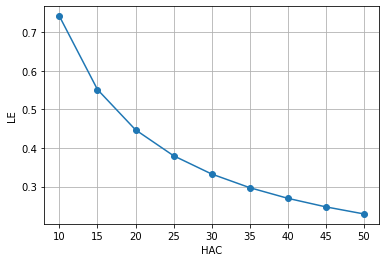

In [12]:
plt.plot(N, LE, marker='o')
plt.xlabel("HAC")
plt.ylabel("LE")
plt.grid()
plt.show()

### maximum pIC50 (IC50) evaluated from LEmax
`assumption:` HAC=40 is roughly equal to MW of 450~500 (see figure from ref.2)  

>pIC50 = HAC * LE / 1.3818

In [13]:
HAC_1=35
HAC_2=40
HAC_3=45
HAC_4=50

labels = ["HAC=35", "HAC=40", "HAC=45", "HAC=50"]

In [14]:
LE = np.arange(0.1,0.51,0.02)

In [15]:
pIC50_1 = [ HAC_1*x/CONST for x in LE ]
pIC50_2 = [ HAC_2*x/CONST for x in LE ]
pIC50_3 = [ HAC_3*x/CONST for x in LE ]
pIC50_4 = [ HAC_4*x/CONST for x in LE ]

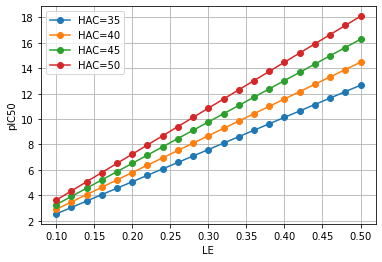

In [16]:
plt.plot(LE, pIC50_1, marker='o')
plt.plot(LE, pIC50_2, marker='o')
plt.plot(LE, pIC50_3, marker='o')
plt.plot(LE, pIC50_4, marker='o')
plt.legend(labels)

plt.xlabel("LE")
plt.ylabel("pIC50")
plt.grid()
plt.show()

In [17]:
pIC50_to_IC50(6)

1000.0